In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
import pathlib
import os
from IPython.display import Image
import numpy as np
from sklearn.metrics import top_k_accuracy_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
#library we will use in the code
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import itertools
import shutil
import random
import glob
import warnings
from tensorflow.keras.models import load_model
import cv2

In [2]:
class_names=['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', 
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']
list.sort(class_names)

In [11]:
test_set = tf.keras.utils.image_dataset_from_directory("C:/Users/DELL G3/Desktop/neural network/project 2/Data/test",
                                                   color_mode='rgb',
                                                   batch_size=128,
                                                   image_size=(224, 224))

Found 3712 files belonging to 104 classes.


In [12]:
test_set=test_set.map(lambda x,y: (x/255, y))

In [13]:
test_set.as_numpy_iterator().next()

(array([[[[0.8156863 , 0.67058825, 0.22352941],
          [0.8865546 , 0.72913164, 0.28207284],
          [0.92857146, 0.76526606, 0.30812323],
          ...,
          [0.59047586, 0.7084031 , 0.29131624],
          [0.53921545, 0.6680671 , 0.24761891],
          [0.5176471 , 0.65882355, 0.23529412]],
 
         [[0.6092437 , 0.5072829 , 0.12492997],
          [0.6970588 , 0.58519405, 0.1979992 ],
          [0.78133255, 0.65038013, 0.24979992],
          ...,
          [0.51784694, 0.6315924 , 0.23629433],
          [0.47583014, 0.5965385 , 0.20712282],
          [0.45910364, 0.5848739 , 0.2044818 ]],
 
         [[0.33361346, 0.30392158, 0.03501401],
          [0.42605042, 0.3831533 , 0.0942177 ],
          [0.53805524, 0.47462988, 0.16276512],
          ...,
          [0.457703  , 0.5607642 , 0.20364143],
          [0.43981573, 0.53957564, 0.20058021],
          [0.42044818, 0.51932776, 0.19859944]],
 
         ...,
 
         [[0.25182065, 0.3207284 , 0.08291326],
          [0.25996

In [14]:
#this is a simple method to calculate the a1-score and F-score accuracy for models on test data
def print_1score_and_fscore(model,typee):
    test_label=[]
    predictions=[]
    for x,y in test_set:
        test_label.append(y)
        predictions.append(model.predict(x))

    test_label=np.array(test_label)
    test_label=test_label.reshape(test_label.shape[0]*test_label.shape[1],1)
    predictions=np.array(predictions)
    predictions=predictions.reshape(predictions.shape[0]*predictions.shape[1],predictions.shape[2])
    print()
    x=top_k_accuracy_score(test_label, predictions, k=1)
    print("the 1-score accuracy for ",typee,"  : ",x)
    x=top_k_accuracy_score(test_label, predictions, k=5)
    print("the F-score accuracy for ",typee," : ",x)
    print()
    

In [16]:
#here we calculate the 1-score and F-score accuracy for our architecture
my_architecture= load_model('C:/Users/DELL G3/Desktop/neural network\project 2/my_archticture.h5')
print_1score_and_fscore(my_architecture,"my_architecture")

4/4 [==============================] - 1s 317ms/step

the 1-score accuracy for  my_architecture :  0.5013469827586207
the F-score accuracy for  my_architecture :  0.7680495689655172



In [17]:
#here we calculate the 1-score and F-score accuracy for our googlenet architecture
googlenet = load_model('C:/Users/DELL G3/Desktop/neural network\project 2/googlenet.h5')
print_1score_and_fscore(googlenet,"googlenet")

4/4 [==============================] - 4s 866ms/step

the 1-score accuracy for  googlenet :  0.6554418103448276
the F-score accuracy for  googlenet :  0.8763469827586207



In [ ]:
#here we calculate the 1-score and F-score accuracy for our resnet architecture
resnet_model = load_model('C:/Users/DELL G3/Desktop/neural network\project 2/resnet_model.h5')
print_1score_and_fscore(resnet_model,"resnet")

4/4 [==============================] - 7s 2s/step
the 1-score accuray for resnet_model:  0.2645474137931034
the F-score accuray for resnet_model:  0.5600754310344828


In [18]:
#here we calculate the 1-score and F-score accuracy for our ensamble model
ensamble_model= load_model('C:/Users/DELL G3/Desktop/neural network\project 2/ensamble_model.h5')
print_1score_and_fscore(ensamble_model,"ensamble_model")

4/4 [==============================] - 10s 3s/step

the 1-score accuracy for  ensamble_model :  0.6748383620689655
the F-score accuracy for  ensamble_model :  0.8440193965517241



In [19]:
#this method to plot the confusion matrix for given model
def print_confusion_matrix(model):
    test_label=[]
    predictions=[]
    for x,y in test_set:
        test_label.append(y)
        predictions.append(model.predict(x))

    test_label=np.array(test_label)
    test_label=test_label.reshape(test_label.shape[0]*test_label.shape[1],1)
    predictions=np.array(predictions)
    predictions=predictions.reshape(predictions.shape[0]*predictions.shape[1],predictions.shape[2])
    ready_predictions = []
    for pred in predictions:
            ready_predictions.append(np.argmax(pred))
    ready_predictions = np.array(ready_predictions)
    ready_predictions=ready_predictions.reshape(ready_predictions.shape[0],1)
    cm = confusion_matrix(test_label, ready_predictions)
    cm_df = pd.DataFrame(cm,
                            index = class_names, 
                            columns = class_names)

        #Plotting the confusion matrix
    plt.figure(figsize=(100,100))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [20]:
print_confusion_matrix(my_architecture)

4/4 [==============================] - 1s 292ms/step


In [21]:
print_confusion_matrix(googlenet)

4/4 [==============================] - 4s 995ms/step


In [24]:
print_confusion_matrix(resnet_model)

4/4 [==============================] - 7s 2s/step


In [25]:
print_confusion_matrix(ensamble_model)

4/4 [==============================] - 11s 3s/step


here we will see some model wrong and right classification 

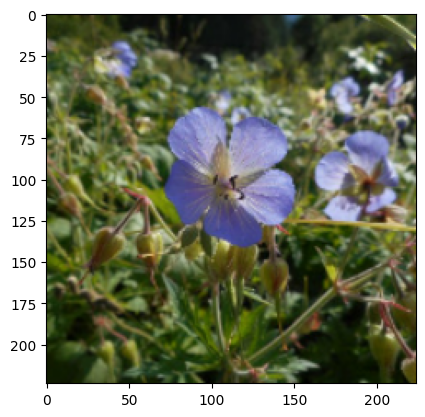

In [27]:
#now we will do right classification
img = cv2.imread('C:/Users/DELL G3/Desktop/neural network/project 2/Data/test/wild geranium/7a1522bd6a899f0580e51c.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(rgb_img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [28]:
#here we must scale the image before give it to the model
yhat = resnet_model.predict(np.expand_dims(resize/255, 0))
class_names[np.argmax(yhat)]

1/1 [==============================] - 3s 3s/step


'wild geranium'

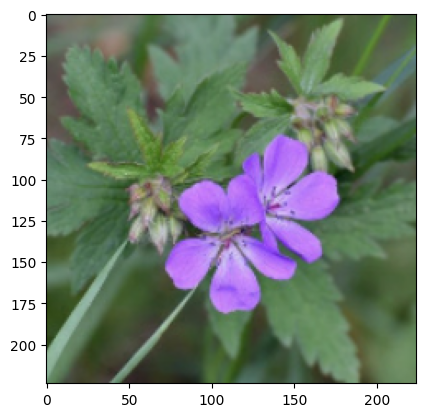

In [29]:
#now with the wrong classification
img = cv2.imread('C:/Users/DELL G3/Desktop/neural network/project 2/Data/test/wild geranium/3af3ed42c61eac9ffe3f09.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(rgb_img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = resnet_model.predict(np.expand_dims(resize/255, 0))
class_names[np.argmax(yhat)]

1/1 [==============================] - 0s 183ms/step


'iris'